## Scan

In [5]:
import sys

sys.path.append("../")

In [6]:
import os
import numpy as np
import itertools

from settings import dev, prod
from src.scan import watch
from src.scan.decorators import add_noise
from src.scan.utils import clear_output, plot_meters_data, plot_motors_data
from src.core import config as cfg

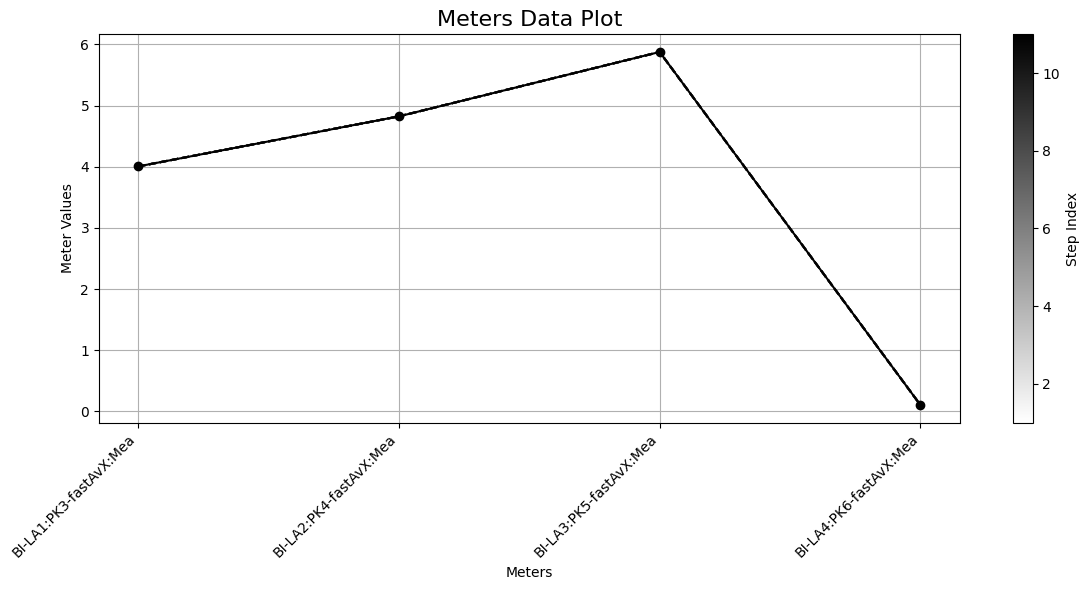

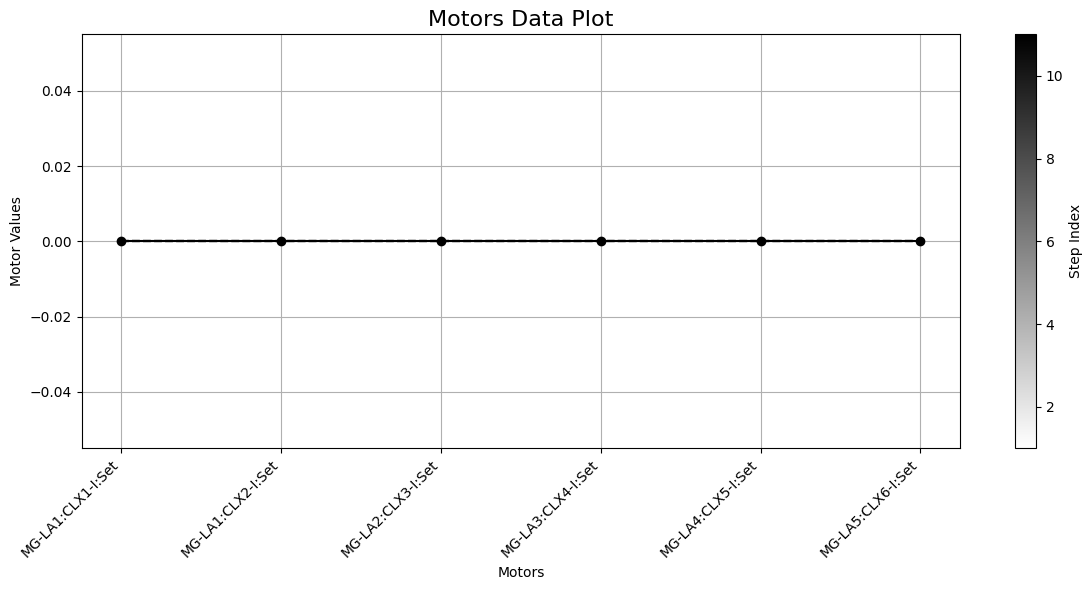

Set motor values:   0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
prod_scan = watch(
    meters=prod.HORIZONTAL_MONITORS, 
    motors=prod.HORIZONTAL_CORRECTORS, 
    get_func=prod.GET_FUNC, 
    put_func=prod.PUT_FUNC, 
    sample_size=prod.SAMPLE_SIZE,
    verify_motor=prod.VERIFY_MOTOR,
    max_retries=prod.MAX_TRIES,
    delay=prod.DELAY,
    tolerance=prod.TOLERANCE,
    save=prod.SAVE_SCAN,
    dirname=os.path.join(prod.DIRNAME_DATA, "watch"),
    callback=[clear_output, plot_meters_data, plot_motors_data], 
    save_original_motor_values=prod.SAVE_ORIGINAL_MOTOR_VALUES,
    parallel=prod.PARALLEL,
    repeat=prod.REPEAT,
)

In [4]:
dev_scan = watch(
    meters=dev.HORIZONTAL_MONITORS, 
    motors=dev.HORIZONTAL_CORRECTORS, 
    get_func=add_noise(dev.NOISE_LEVEL)(dev.GET_FUNC),
    put_func=dev.PUT_FUNC, 
    sample_size=dev.SAMPLE_SIZE,
    verify_motor=dev.VERIFY_MOTOR,
    max_retries=dev.MAX_TRIES,
    delay=dev.DELAY,
    tolerance=dev.TOLERANCE,
    save=dev.SAVE_SCAN,
    dirname=os.path.join(dev.DIRNAME_DATA, "watch"),
    callback=[clear_output, plot_meters_data, plot_motors_data], 
    save_original_motor_values=dev.SAVE_ORIGINAL_MOTOR_VALUES,
    parallel=dev.PARALLEL,
    repeat=dev.REPEAT,
)

2025-02-04 13:44:39,810 - Elegant - ERROR - Element 'MG-LA1.CL1' is not exists!
2025-02-04 13:44:39,811 - Elegant - ERROR - Element 'MG-LA1.CL1' is not exists!


NameError: free variable 'on_values' referenced before assignment in enclosing scope

In [12]:
!elegant

Running elegant at Tue Feb  4 13:31:37 2025

This is elegant 2023.4, Oct  7 2024, by M. Borland, J. Calvey, M. Carla', N. Carmignani, AJ Dick, Z. Duan, M. Ehrlichman, L. Emery, W. Guo, N. Kuklev, R. Lindberg, V. Sajaev, R. Soliday, Y.-P. Sun, M. Wallbank, C.-X. Wang, Y. Wang, Y. Wu, and A. Xiao.
usage: elegant {<inputfile>|-pipe=in} [-macro=<tag>=<value>,[...]] [-rpnDefns=<filename>] [-configuration=<filename>]
Thanks for using elegant.  Please cite the following reference in your publications:
  M. Borland, "elegant: A Flexible SDDS-Compliant Code for Accelerator Simulation,"
  Advanced Photon Source LS-287, September 2000.
If you use a modified version, please indicate this in all publications.
Link date: Oct  7 2024 23:28:30, SVN revision: 2023.4.0
